In [1]:
import sys

import numpy as np

from scipy import linalg
from scipy import integrate
from decimal import Decimal
from sympy.plotting import plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
 def plot_system(system, init_cond, time, gamma=lambda i: [i, i]):
    plt.figure(figsize=(20,20))
    for i in range(1,11):
        plt.subplot(5,5,i)

        u = gamma(i)

        сonditions, infodict = integrate.odeint(system, init_cond, time, (u,), full_output=True)
        x1, x2 = сonditions.T
        
        plt.plot(time, x1, 'b-', label='x1')
        plt.plot(time, x2, 'r-', label='x2')
        
        show_u1 = "{:.2E}".format(Decimal(u[0]))
        show_u2 = "{:.2E}".format(Decimal(u[1]))

        plt.title("u1={0}, u2={1}".format(show_u1, show_u2))

        plt.legend()
        plt.grid(True)

In [3]:

def plot_phase(frame, init_cond, time, gamma=lambda i: [i, i], k=0, step=100):
    plt.figure(figsize=(20,20))
    for i in range(1,11):
        plt.subplot(5,5,i)
        
        right = frame[0]
        left = frame[1]

        x,y = np.linspace(right, left, step),np.linspace(right, left, step)
        X,Y = np.meshgrid(x,y)

        u = gamma(i)

        U = a1*X + b1*np.sign(Y) + k*u[0]
        V = a2*Y + b2*np.sign(X) + k*u[1]

        speed = np.sqrt(U*U + V*V)
        start = [init_cond]

        plt.streamplot(x,y, U, V, color=(.75,.90,.93))
        plt.streamplot(x,y, U, V, start_points=start, color="crimson", linewidth=2)

        plt.plot(init_cond[0], init_cond[1], color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=5)

        show_u1 = "{:.2E}".format(Decimal(u[0]))
        show_u2 = "{:.2E}".format(Decimal(u[1]))

        plt.title("u1={0}, u2={1}".format(show_u1, show_u2))

###  1. Set dynamical system

\begin{equation}
\begin{array}{l}
\dot{x}_{1}=-5 x_{1}+3 \operatorname{sign}\left(x_{2}\right)+u_{1} \\
\dot{x}_{2}=-10 x_{2}+2 \operatorname{sign}\left(x_{1}\right)+u_{2}
\end{array}
\end{equation}

In [4]:
a1 = -5.; a2 = -10.
b1 = 3.; b2 = 2.

def system(x, t, u):
    return np.array([ a1*x[0] + b1*np.sign(x[1]) + u[0],
                      a2*x[1] + b2*np.sign(x[0]) + u[1]  ])

\begin{equation}
x_{1}(0)=10, x_{2}(0)=-10
\end{equation}

In [12]:
init_cond = np.array([10, -10]) 
time = np.linspace(0,100,1000) 

###  2. Plot dynamical system

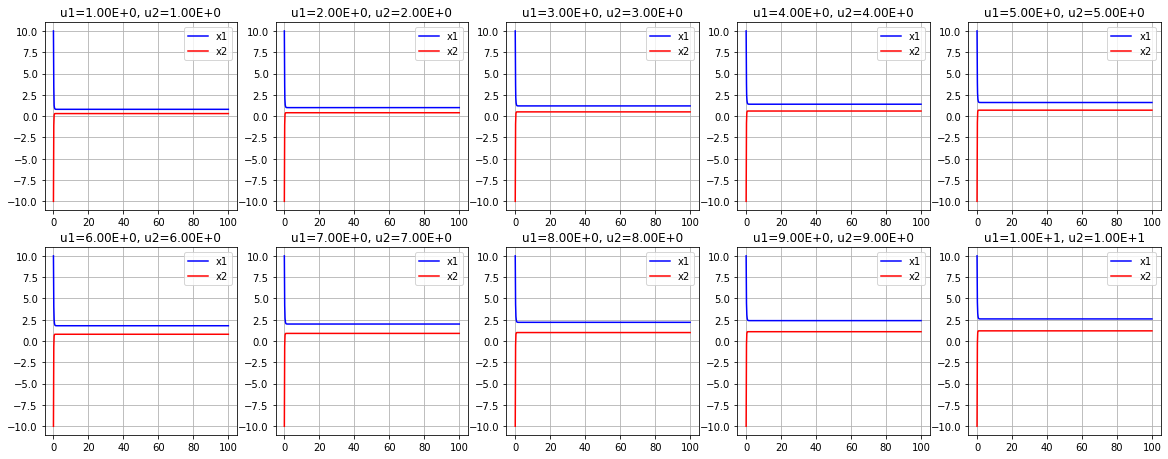

In [13]:
plot_system(system, init_cond, time)

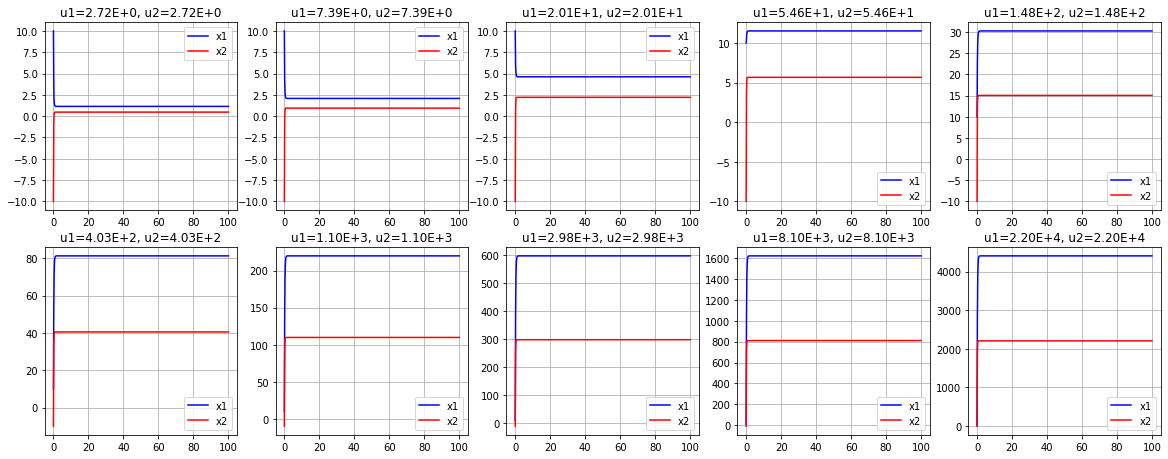

In [14]:
plot_system(system, init_cond, time, gamma=lambda i: [np.exp(i), np.exp(i)])

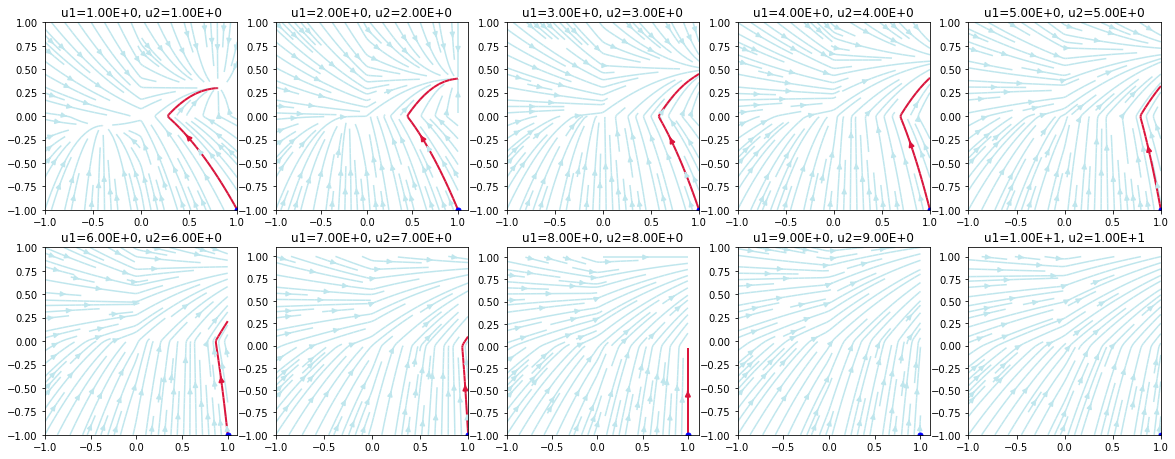

In [15]:
# frame, init_cond, time
plot_phase([-1, 1], [1, -1], time, k=1)

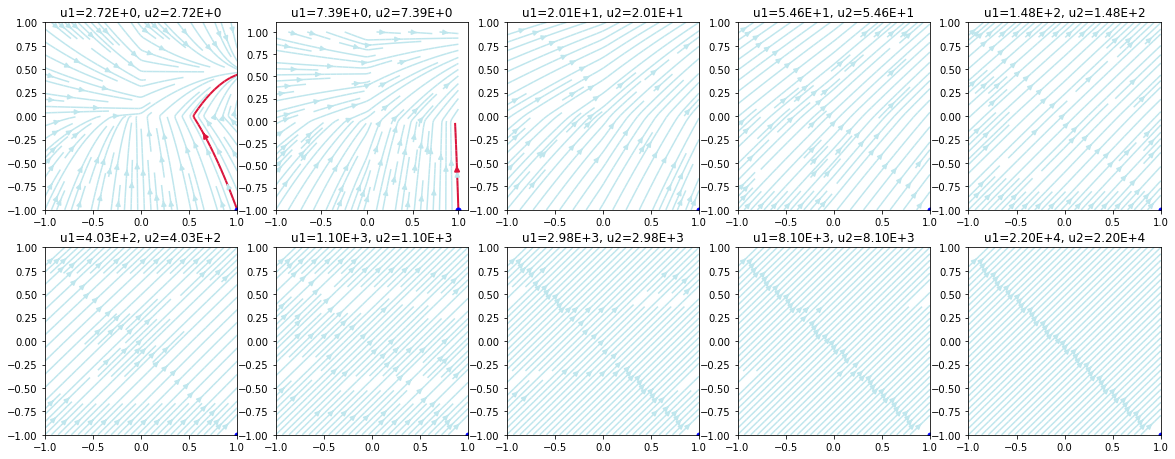

In [16]:
# frame, init_cond, time
plot_phase([-1, 1], [1, -1], time, gamma=lambda i: [np.exp(i), np.exp(i)], k=1)

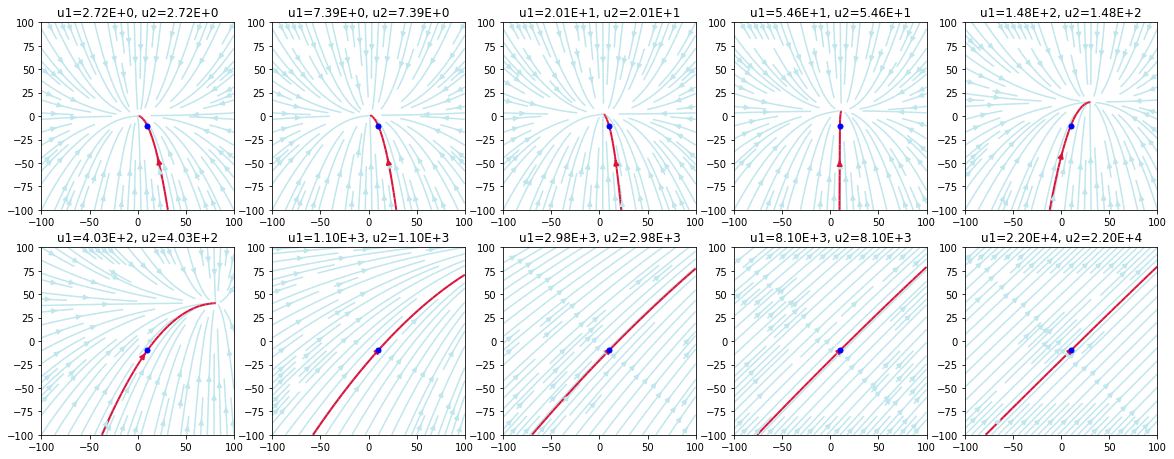

In [17]:
# frame, init_cond, time
plot_phase([-100, 100], init_cond, time, gamma=lambda i: [np.exp(i), np.exp(i)], k=1, step=1000)

Check myself by ploting phase portrait in wolframalpha

https://www.wolframalpha.com/input/?i=dx%2Fdt+%3D+-5*x+%2B+3*sign%28y%29+and+dy%2Fdt+%3D+-10*y+%2B+2*sign%28x%29


###  3. Single Layer Network

Let select the neural network as $\left(\gamma\left(u_{t}\right)=u_{t}\right)$
$$
\widehat{x}_{t}=A \widehat{x}_{t}+W_{1, t} \sigma\left(\widehat{x}_{t}\right)+W_{2, t} \phi\left(\widehat{x}_{t}\right) u_{t}
$$


and sigmoid functions are
$$
\begin{array}{l}
\sigma\left(x_{i}\right)=2 /\left(1+e^{-2 x_{i}}\right) 2-0.5 \\
\phi\left(x_{i}\right)=0.2 /\left(1+e^{-0.2 x_{i}}\right)-0.05
\end{array}
$$

In [11]:
# x must be np.array 
def sigma(x):
    return 2 / (1 + np.exp(-2*x)) - 0.5

def phi(x):
    return 0.2 / (1 + np.exp(-0.2*x)) - 0.05

the matrix Riccati

\begin{equation}
A^{T} P+P A+P R P+Q=0
\end{equation}

\begin{equation}
A=\left[\begin{array}{rr}
-15 & 0 \\
0 & -10
\end{array}\right]

R=\left[\begin{array}{ll}
8 & 2 \\
2 & 8
\end{array}\right]

Q=\left[\begin{array}{ll}
2 & 1 \\
1 & 2
\end{array}\right]

Q_{0}=I

\end{equation}



In [18]:
A = np.array([[-15, 0],
              [0, -10]])

B = np.array([[1, 1],
              [1, 1]])

R = np.array([[8, 2],
              [2, 8]])

Q = np.array([[2, 1],
              [1, 2]])

Q_0 = np.diag([1, 1])

In [19]:
-1*np.diag([1, 1])

array([[-1,  0],
       [ 0, -1]])

More information about linalg.solve_continuous_are:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_continuous_are.html#scipy.linalg.solve_continuous_are

In [20]:
P = linalg.solve_continuous_are(A, B, Q, R)

\begin{equation}
P=\left[\begin{array}{cc}
0.06 & 0.04 \\
0.04 & 0.106
\end{array}\right]
\end{equation}

In [21]:
P

array([[0.06659109, 0.03988102],
       [0.03988102, 0.09980488]])

In [22]:
P = np.array([[0.06, 0.04],
              [0.04, 0.106]])

 Вead-zone function $s_{t}$ is defined as
$$
\begin{array}{l}
s_{t}:=\left[1-\frac{\mu}{\left\|P^{1 / 2} \Delta\right\|}\right]_{+},[z]_{+}=\left\{\begin{array}{ll}
z & z \geq 0 \\
0 & z<0
\end{array}\right. \\
\mu=\left(\bar{\eta}_{\sigma}+\bar{\eta}_{\phi} \bar{u}\right) / \lambda_{\min }\left(P^{-1 / 2} Q_0 P^{-1 / 2}\right)
\end{array}
$$


\begin{equation}
\bar{u}=1, \quad \bar{\eta}_{\phi}=\bar{\eta}_{\sigma}=2, \quad K_{1}=K_{2}=10 I
\end{equation}

In [23]:
u_ = 1; nu_phi = 2; nu_sigma = 2
K_1 = K_2 = 10*np.diag([1, 1])

lambda_min = min(linalg.eigvals(P))

delta = np.array([0.2, 0.1]).reshape(-1,1)
x_ = np.array([0.1, 0.3]).reshape(-1,1)

In [30]:
def nu(P, Q, u_, nu_phi, nu_sigma, lambda_min):
    P_inv = np.linalg.inv(P)
    P_inv_sqr = np.sqrt(P_inv.astype(np.complex))
    print(P, P_inv, P_inv_sqr) 
    tmp_matrix = (P_inv_sqr*Q)*P_inv_sqr
    #tmp_matrix = np.matmul(np.matmul(P_inv_sqr, Q), P_inv_sqr)
    return np.min(linalg.eigvals(tmp_matrix))
    #return ((nu_sigma + nu_phi*u_) / lambda_min ) * (P_inv_sqr*Q*P_inv_sqr)

In [63]:
def u_func(t):
    return np.sin(t).reshape(-1,1)

In [32]:
def s(delta, P, nu):
    P_sqrt = np.sqrt(P.astype(np.complex))
    norma  = linalg.norm((P_sqrt * delta))
    #norma = np.sqrt( (P_sqrt * delta)*(P_sqrt * delta).T )
    return norma #* np.linalg.inv(nu_matrix)
    #return sign_plus(1 - norma * np.linalg.inv(nu_matrix))

In [33]:
nu_val = nu(P, Q, u_, nu_phi, nu_sigma, lambda_min)
s(delta, P, nu_val)
#delta.reshape(-1,1)

[[0.06  0.04 ]
 [0.04  0.106]] [[22.26890756 -8.40336134]
 [-8.40336134 12.60504202]] [[4.71899434+0.j         0.        +2.89885518j]
 [0.        +2.89885518j 3.55035801+0.j        ]]


0.07389181280764467

\begin{equation}
\begin{array}{c}
\dot{W}_{1, t}=-s_{t} K_{1} P \Delta_{t} \sigma\left(\widehat{x}_{t}\right)^{T} \\
\dot{W}_{2, t}=-s_{t} K_{2} P \Delta_{t} u_{t}^{T} \phi\left(\widehat{x}_{t}\right)^{T}
\end{array}
\end{equation}

In [230]:
def W_1(x, t, u):
    matrix = K_1 * P * delta * sigma(x)
    #vector = np.sum(matrix, axis=1)
    return np.sum(matrix, axis=1)

def W_2(x, t, u):
    matrix = K_2 * P * delta * u_func(t) * phi(x)
    #vector = np.sum(matrix, axis=1)
    return np.sum(matrix, axis=1)

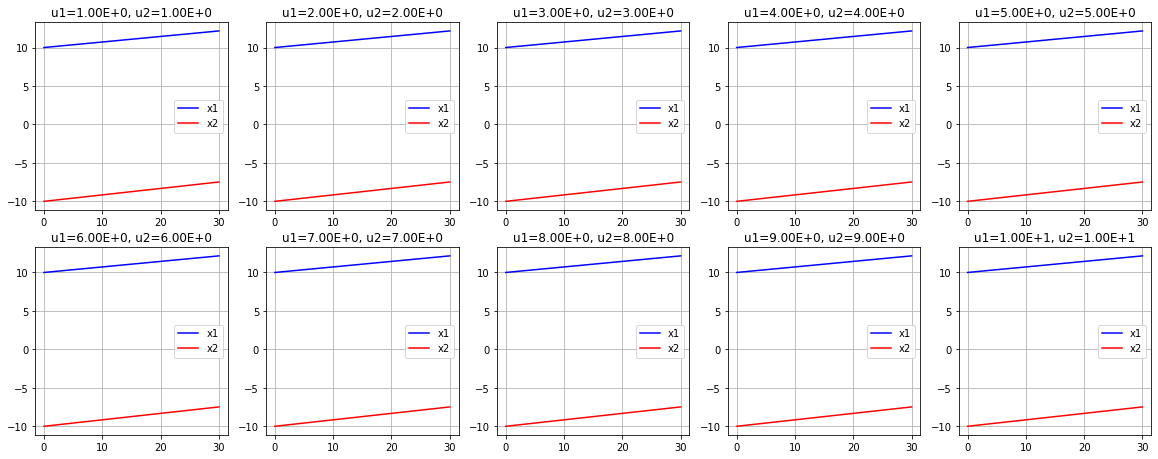

In [212]:
plot_system(W_1, init_cond, time)

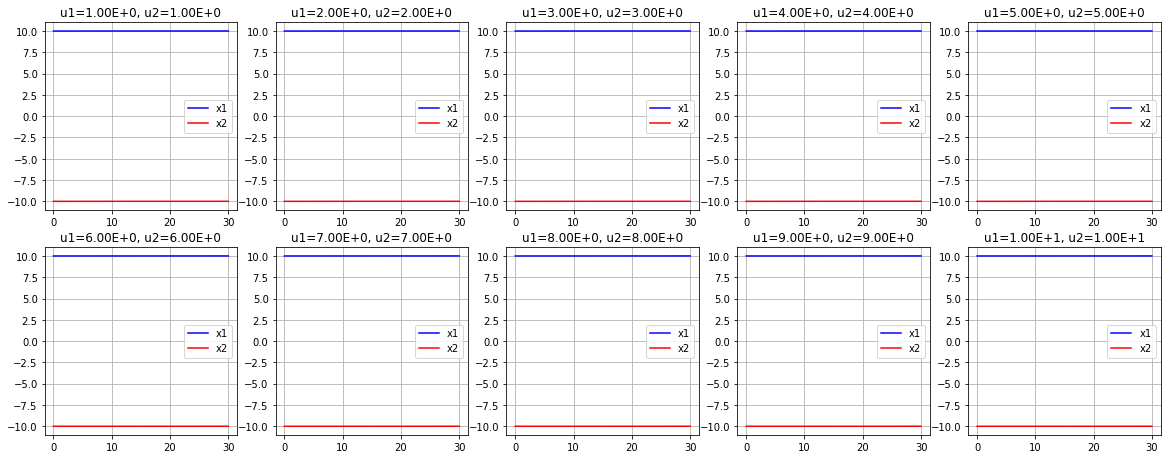

In [231]:
plot_system(W_2, init_cond, time)

In [232]:
w1_states, w1_info = integrate.odeint(W_1, init_cond, time, (u,), full_output=True)

In [234]:
w1_states.shape

(1000, 2)

In [235]:
w2_states, w2_info = integrate.odeint(W_2, init_cond, time, (u,), full_output=True)

In [236]:
w2_states.shape

(1000, 2)

In [50]:
x = np.array([1, 2]).reshape(-1, 1)
t = np.array([0.6, 0.2]).reshape(-1, 1)

In [70]:
np.matmul(
    np.matmul(
        np.matmul(
            np.matmul(K_1, P), 
                                                    delta), 
                                                        u_func(t).T),
                                                            sigma(x)) 

array([[0.16051312],
       [0.18659651]])

In [69]:
np.matmul(np.matmul(K_1, P), delta)

array([[0.16 ],
       [0.186]])

In [67]:
u_func(t)

array([[0.56464247],
       [0.19866933]])